# Load dataset

## Observation:
 - Dataset has been loaded successfully using pd.read_csv("/content/scores_data.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/scores_data.csv")

#Previewing the first few rows

##Observation:
The preview shows the first few rows of the data and helps us check if the file loaded correctly.

#

In [5]:
df.head(5)

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


# Understanding the Structure of the Dataset

## Observation:
* The dataset contains 143 rows × 3 columns representing various job-related features.

In [6]:
df.shape

(149, 3)

# Dataset Structure and Data Types

## Observation
The dataset contains 143 records and 3 columns.
 - Out of the 3 columns:
    - 15 are categorical (object type), such as  Batch,User_ID,Score                 

 - The dataset occupies approximately 3.6+ KB of memory.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


#Statistical Overview of Numerical Data


##observation

+ The average score is 4.38 with a median of 4, indicating generally above-average performance.

+ A standard deviation of 1.59 shows moderate variation, with most scores clustered between 3 and 5.

+ The score ranges from 0 to 7, suggesting few extreme low or perfect scores.

In [8]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


#Null Value Count Across All Columns

#observation :
- The data set contain no null values

In [9]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [15]:
print(df.columns)


Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [16]:
# Clean column names (important)
df.columns = df.columns.str.strip()

# Create numeric score column
df["Score_numeric"] = df["Score"].str.split("/").str[0].astype(int)

# Get value counts
df["Score_numeric"].value_counts().sort_index()


,count
Score_numeric,
0,2
1,3
2,12
3,24
4,40
5,32
6,18
7,18


#Checking for Duplicates

##Observation:
As seen there are no duplicates found in the dataset.

In [18]:
df.duplicated().sum()

np.int64(0)

#Detecting Outliers

- The IQR (Interquartile Range) method was used to detect outliers in all numerical columns as part of the non-visual analysis.
##Steps:
- Calculate Q1 (25th percentile) and Q3 (75th percentile)
- Compute IQR = Q3 - Q1
- Define lower and upper bounds:
- Lower bound = Q1 − 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR
- Any value outside this range is considered an outlier


##observation:
+ Most people scored within a normal range, showing that performance is generally consistent.

* A few individuals scored very low or achieved perfect scores, which naturally stand out from the rest.

* These extreme scores are rare and do not really change the overall understanding of the results.

In [23]:

df.columns = df.columns.str.strip()
df["Score_numeric"] = df["Score"].str.split("/").str[0].astype(int)

# Define numerical columns
num_cols = ["Score_numeric"]

# Outlier detection using IQR
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers


{'Score_numeric': Empty DataFrame
 Columns: [Batch, User_ID, Score, Score_numeric]
 Index: []}

In [25]:
df

,Batch,User_ID,Score,Score_numeric
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4
...,...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7,4
145,AI_ELITE_4,uid_4,4 / 7,4
146,AI_ELITE_4,uid_3,4 / 7,4
147,AI_ELITE_4,uid_2,3 / 7,3


**Univariate Analysis (Score)**

* The scores range from 0 to 7, covering the full scale of performance.

* Most participants scored between 3 and 5, showing average to good performance overall.

* Only a small number of users scored very low or achieved perfect scores, so extreme values are rare.

**Bivariate Analysis (Batch vs Score)**

* When comparing batches, scores improve steadily from AI_ELITE_4 to AI_ELITE_7.

* The AI_ELITE_7 batch has the highest average scores, indicating stronger overall performance.

* This pattern suggests that later batches benefited from better learning, experience, or training improvements.

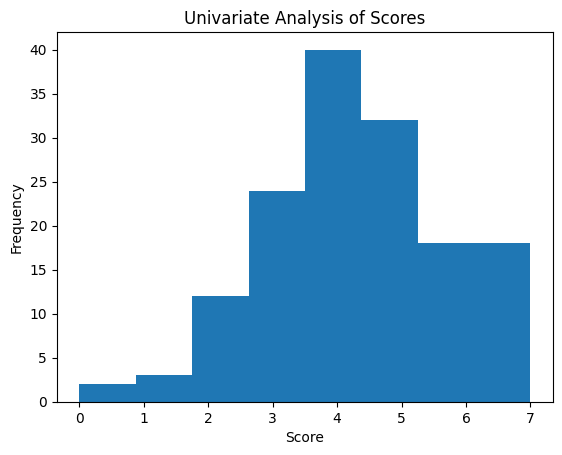

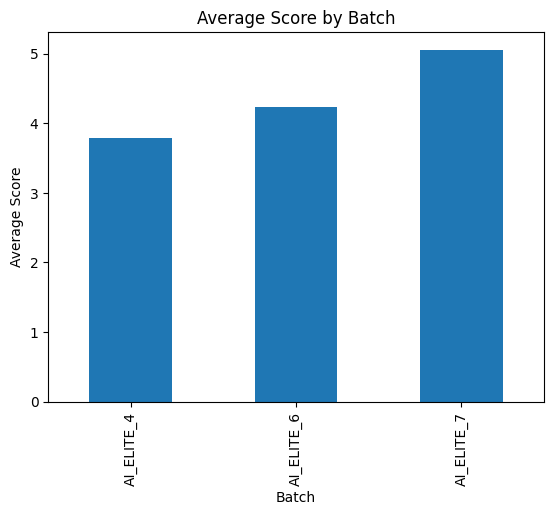

In [37]:

# ---------------------------
# UNIVARIATE ANALYSIS
# ---------------------------

# Summary statistics
df["Score_numeric"].describe()

# Value counts
df["Score_numeric"].value_counts().sort_index()

# Histogram
plt.figure()
df["Score_numeric"].plot(kind="hist", bins=8)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Univariate Analysis of Scores")
plt.show()

# ---------------------------
# BIVARIATE ANALYSIS
# ---------------------------

# Average score per batch
batch_avg = df.groupby("Batch")["Score_numeric"].mean()

# Bar chart
plt.figure()
batch_avg.plot(kind="bar")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.title("Average Score by Batch")
plt.show()



#Score Distribution Across Batches
* Each batch’s score spread is clearly visible

* AI_ELITE_7 shows higher median scores

* Earlier batches show lower and more spread-out scores

<Figure size 640x480 with 0 Axes>

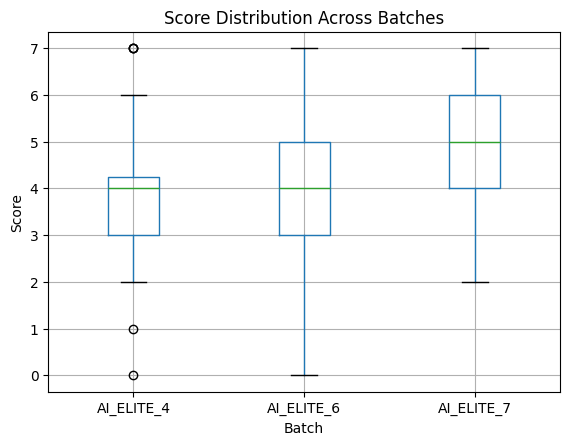

In [36]:
# Boxplot
plt.figure()
df.boxplot(column="Score_numeric", by="Batch")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.title("Score Distribution Across Batches")
plt.suptitle("")
plt.show()